In [6]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/Inteligencia Artificial - I/Opción I')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1lBhm112YiMUZzXUG1wX-mKCH1zi7fLPe/Opción I


In [7]:
#import os
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)
#os.chdir('/content/drive/My Drive/Opción I')
#print(os.getcwd())

Evaluación de modelos de machine learning en la clasificación de litologías a partir de registros de pozo

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [9]:
full_Dataset = pd.DataFrame(pd.read_csv("train.csv",delimiter=";"))
d_tst = pd.DataFrame(pd.read_csv("test.csv",delimiter=";"))

In [10]:
full_Dataset.shape

(1170511, 29)

In [11]:
full_Dataset.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [12]:
full_Dataset.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,69353.000000,765409.000000,671692.000000,1.089648e+06,864247.000000,682657.000000,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,64.895910,0.331966,6.319719,1.133581e+02,60.033980,11.931432,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,38.435818,0.130483,10.955360,2.999050e+01,76.574359,3.330242,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,-777.985962,-0.035822,0.099718,7.415132e+00,-999.000000,6.000000,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,42.962429,0.241365,3.414440,8.782584e+01,32.402981,8.500000,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,69.562714,0.326800,4.313530,1.095852e+02,55.390942,12.250001,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,87.910156,0.422951,5.968794,1.407745e+02,83.393299,12.250001,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,963.608582,0.999570,383.129974,3.204789e+02,526.547302,26.000002,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [13]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [14]:
# -- Areglar el dataset 
# Features of interest
# Tomamos como características de interes todos los registros del dataset
columns = ['Z_LOC','CALI',	'RSHA',	'RMED',	'RDEP',	'RHOB',	'GR',	'SGR',
           'NPHI',	'PEF',	'DTC',	'SP',	'BS',	'ROP',	'DTS',	'DCAL',	'DRHO',
           'ROPA',	'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY']

data = full_Dataset[columns]

data['FORCE_2020_LITHOFACIES_LITHOLOGY'].replace(lithology_keys, inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,SGR,NPHI,PEF,DTC,SP,BS,ROP,DTS,DCAL,DRHO,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY
0,-469.501831,19.480835,NaN,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379,NaN,34.636410,NaN,NaN,-0.574928,NaN,NaN,Shale
1,-469.653809,19.468800,NaN,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531,NaN,34.636410,NaN,NaN,-0.570188,NaN,NaN,Shale
2,-469.805786,19.468800,NaN,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357,NaN,34.779556,NaN,NaN,-0.574245,NaN,NaN,Shale
3,-469.957794,19.459282,NaN,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688,NaN,39.965164,NaN,NaN,-0.586315,NaN,NaN,Shale
4,-470.109772,19.453100,NaN,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078,NaN,57.483765,NaN,NaN,-0.597914,NaN,NaN,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,NaN,8.423170,NaN,NaN,NaN,2.527984,77.654900,NaN,NaN,4.586425,NaN,NaN,8.5,27.674368,NaN,NaN,-0.001763,26.673708,NaN,Sandstone
1170507,NaN,8.379244,NaN,NaN,NaN,2.537613,75.363937,NaN,NaN,7.019858,NaN,NaN,8.5,28.024338,NaN,NaN,-0.007600,26.840818,NaN,Sandstone/Shale
1170508,NaN,8.350248,NaN,NaN,NaN,2.491860,66.452843,NaN,NaN,9.049782,NaN,NaN,8.5,28.091282,NaN,NaN,-0.018297,27.007942,NaN,Sandstone/Shale
1170509,NaN,8.313779,NaN,NaN,NaN,2.447539,55.784817,NaN,NaN,8.903917,NaN,NaN,8.5,28.019775,NaN,NaN,-0.011438,27.175179,NaN,Sandstone/Shale


In [15]:
data.isna().any()
##Solo Gamma Ray presenta todos los valores, los demas presentan algún NaN

Z_LOC                                True
CALI                                 True
RSHA                                 True
RMED                                 True
RDEP                                 True
RHOB                                 True
GR                                  False
SGR                                  True
NPHI                                 True
PEF                                  True
DTC                                  True
SP                                   True
BS                                   True
ROP                                  True
DTS                                  True
DCAL                                 True
DRHO                                 True
ROPA                                 True
RXO                                  True
FORCE_2020_LITHOFACIES_LITHOLOGY    False
dtype: bool

In [16]:
print(data.isna().sum()*100/data.shape[0])

Z_LOC                                0.920538
CALI                                 7.507576
RSHA                                46.121822
RMED                                 3.331280
RDEP                                 0.941042
RHOB                                13.777658
GR                                   0.000000
SGR                                 94.074981
NPHI                                34.608987
PEF                                 42.615490
DTC                                  6.908350
SP                                  26.164983
BS                                  41.678720
ROP                                 54.287401
DTS                                 85.082327
DCAL                                74.469868
DRHO                                15.604638
ROPA                                83.569142
RXO                                 72.027004
FORCE_2020_LITHOFACIES_LITHOLOGY     0.000000
dtype: float64


In [17]:
#Eliminamos los registros que presentan un procentaje de ausencia mayor al 50%
## SGR: Spectral Gamma Ray
## ROP: Rate of Penetration
## DTS: Sonic (Sheer Slowness)
## RXO: Resistivity of flushed zone.
## ROPA
## DCAL
data = data.drop(columns=['SGR','PEF','DTS','ROPA','RXO','DCAL','RSHA'])
data.shape

(1170511, 13)

In [18]:
listDict = []
col = data.columns[:-1]
for i in col:
  print(i)
  listDict.append(data.groupby(['FORCE_2020_LITHOFACIES_LITHOLOGY'])[i].mean().to_dict())
  
listDict
#meanROP = data.groupby(['FORCE_2020_LITHOFACIES_LITHOLOGY'])['ROP'].mean()
#meanROP = meanROP.to_dict()
#data.groupby(['FORCE_2020_LITHOFACIES_LITHOLOGY'])['ROP'].mean().to_dict()

Z_LOC
CALI
RMED
RDEP
RHOB
GR
NPHI
DTC
SP
BS
ROP
DRHO


[{'Anhydrite': -2516.6733954719803,
  'Basement': -2867.387761689319,
  'Chalk': -1908.6549166360837,
  'Coal': -2945.2761816329235,
  'Dolomite': -2149.26297591165,
  'Halite': -2868.8836021122675,
  'Limestone': -2392.574534996767,
  'Marl': -2386.4995324276797,
  'Sandstone': -2178.4188673668423,
  'Sandstone/Shale': -2401.4618142225527,
  'Shale': -2048.2949855175634,
  'Tuff': -1629.4693629173914},
 {'Anhydrite': 12.521718729669388,
  'Basement': 12.558045507757893,
  'Chalk': 13.382053965773512,
  'Coal': 11.788745553438977,
  'Dolomite': 13.832314425663101,
  'Halite': 12.497692459871782,
  'Limestone': 12.172469749029762,
  'Marl': 12.55091944442414,
  'Sandstone': 12.447313761196646,
  'Sandstone/Shale': 12.55903903677936,
  'Shale': 13.579110446922245,
  'Tuff': 15.281506743693544},
 {'Anhydrite': 304.290370940832,
  'Basement': 8.994735684404997,
  'Chalk': 2.1501245327338556,
  'Coal': 36.72156168003537,
  'Dolomite': 7.267831385512356,
  'Halite': 13.034341430635001,
  'Li

In [19]:
for index,i in enumerate(listDict): # i es el diccionario de cada columna
  for j in i: ## J es el nombre de la litofacie
    data.iloc[:,index][(data['FORCE_2020_LITHOFACIES_LITHOLOGY']==j) & (data.iloc[:,index].isnull())] = i[j]
    
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Z_LOC,CALI,RMED,RDEP,RHOB,GR,NPHI,DTC,SP,BS,ROP,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY
0,-469.501831,19.480835,1.611410,1.798681,1.884186,80.200851,0.382279,161.131180,24.612379,12.2706,34.636410,-0.574928,Shale
1,-469.653809,19.468800,1.618070,1.795641,1.889794,79.262886,0.382279,160.603470,23.895531,12.2706,34.636410,-0.570188,Shale
2,-469.805786,19.468800,1.626459,1.800733,1.896523,74.821999,0.382279,160.173615,23.916357,12.2706,34.779556,-0.574245,Shale
3,-469.957794,19.459282,1.621594,1.801517,1.891913,72.878922,0.382279,160.149429,23.793688,12.2706,39.965164,-0.586315,Shale
4,-470.109772,19.453100,1.602679,1.795299,1.880034,71.729141,0.382279,160.128342,24.104078,12.2706,57.483765,-0.597914,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,-2178.418867,8.423170,6.468778,11.191147,2.527984,77.654900,0.241440,105.137163,55.811695,8.5000,27.674368,-0.001763,Sandstone
1170507,-2401.461814,8.379244,4.326043,4.332806,2.537613,75.363937,0.286859,103.501079,52.852038,8.5000,28.024338,-0.007600,Sandstone/Shale
1170508,-2401.461814,8.350248,4.326043,4.332806,2.491860,66.452843,0.286859,103.501079,52.852038,8.5000,28.091282,-0.018297,Sandstone/Shale
1170509,-2401.461814,8.313779,4.326043,4.332806,2.447539,55.784817,0.286859,103.501079,52.852038,8.5000,28.019775,-0.011438,Sandstone/Shale


In [20]:
print("Atributo         --      Porcentaje de NaN")
print(data.isna().sum()*100/data.shape[0]) ## Se elimin+o todos los null por el promedio de cada litofacie//litología

Atributo         --      Porcentaje de NaN
Z_LOC                               0.0
CALI                                0.0
RMED                                0.0
RDEP                                0.0
RHOB                                0.0
GR                                  0.0
NPHI                                0.0
DTC                                 0.0
SP                                  0.0
BS                                  0.0
ROP                                 0.0
DRHO                                0.0
FORCE_2020_LITHOFACIES_LITHOLOGY    0.0
dtype: float64


In [26]:
#### CONSTRUCCIÓN DE DATASET TEST Y TRAIN CON 15% PARA TEST
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
data = shuffle(data)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [22]:
#Para la primera entregar usaremos los modelos básicos de clasificación

#------ Use the estimators as they comes, with no other kind of data processing
## Naive-Gaussian-Bayes
## Decision Tree
## Random Forest
## Support Vector Machine
## Logistic Classifier

# ------ Using PCA - Features Importance (DT) - Curvas de aprendizaje  - LeaveOneOut

# ------ Usas Redes Neuronales 
# ------ Una sola capa intermedia
# ------ multicapa tanh, relu, elu (Softmax obligatoria en la capa de clases)

In [23]:
#@title **code**
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [24]:
## Naive-Guassian-Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import *

print("GNB Con crossval")
estGB_1 = GaussianNB()
s = cross_val_score(estGB_1, X, y, cv=KFold(20, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

print("GNB Sin crossval")
estGB_2 = GaussianNB()
estGB_2.fit(X_train,y_train)
predict = estGB_2.predict(X_test)
acc = accuracy_score(y_test,predict)
print("accuracy %.3f"%acc)

GNB Con crossval
accuracy 0.185 (+/- 0.03307)
GNB Sin crossval
accuracy 0.177


Decision Tree Sin crossval
accuracy 0.786
Decision Tree con crossval


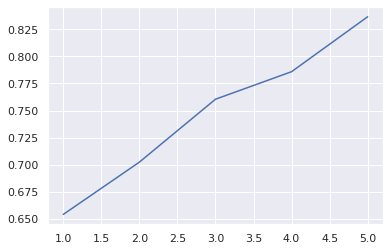

In [25]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score



print("Decision Tree Sin crossval")
est = DecisionTreeClassifier(max_depth=4)
est.fit(X_train,y_train)
predict = est.predict(X_test)
acc = accuracy_score(y_test,predict)
print("accuracy %.3f"%acc)

scores = []
depths = range(1,6,1)

print("Decision Tree con crossval")
for i in depths:
  est = DecisionTreeClassifier(max_depth=i)
  s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
  scores.append(np.mean(s))

plt.plot(depths, scores)
plt.show()
# print("Decision Tree con crossval")
# est = DecisionTreeClassifier(max_depth=4)
# s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
# print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))